## The Sparks Foundation (GRIP)

<b>Name</b> : Abhik Biswas <br>
<b>Task 2 Unsupervised ML</b> : Perform Clustering on the Iris Dataset and Predict the optimal number of clusters and visualize it.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.drop(['Id'] , axis = 1)

In [5]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


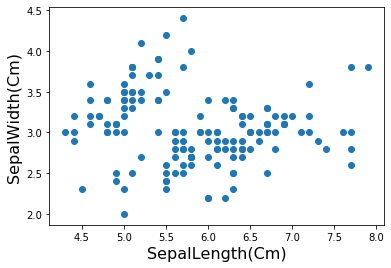

In [6]:
plt.scatter(data['SepalLengthCm'] , data['SepalWidthCm'])
plt.xlabel('SepalLength(Cm)' , size = 16)
plt.ylabel('SepalWidth(Cm)' , size = 16)
plt.show()

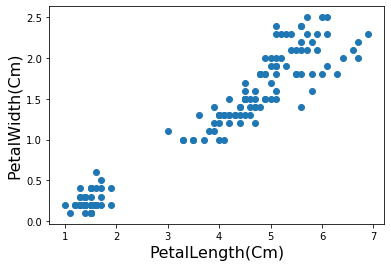

In [7]:
plt.scatter(data['PetalLengthCm'] , data['PetalWidthCm'])
plt.xlabel('PetalLength(Cm)' , size = 16)
plt.ylabel('PetalWidth(Cm)' , size = 16)
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
x = data.iloc[:,:-1]

In [10]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
wcss = []
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

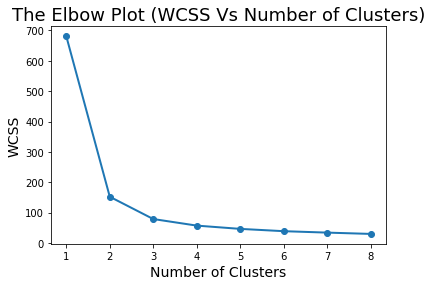

In [12]:
plt.plot(range(1,9) , wcss , marker = 'o' , lw = 2)
plt.xlabel('Number of Clusters' , size = 14)
plt.ylabel('WCSS' , size = 14)
plt.title('The Elbow Plot (WCSS Vs Number of Clusters)' , size = 18)
plt.show()

From the <b>Elbow Curve</b> it is very clear that the optimal number of clusters could be 3 or 4 as there is no significant change in <b>Within Cluster Sum of Squares</b> after 3 or 4. I will be trying with both 3 and 4 to check which one is better.

In [13]:
x_1 = x.copy()

## KMeans with number of clusters = 3

In [14]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
x['Cluster'] = kmeans.fit_predict(x)

In [15]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


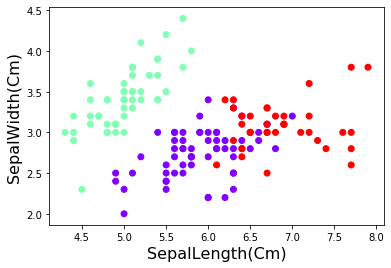

In [16]:
plt.scatter(x['SepalLengthCm'] , x['SepalWidthCm'] , c = x['Cluster'] , cmap = 'rainbow')
plt.xlabel('SepalLength(Cm)' , size = 16)
plt.ylabel('SepalWidth(Cm)' , size = 16)
plt.show()

## KMeans with number of clusters = 4

In [17]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_1)
x_1['Cluster'] = kmeans.fit_predict(x_1)

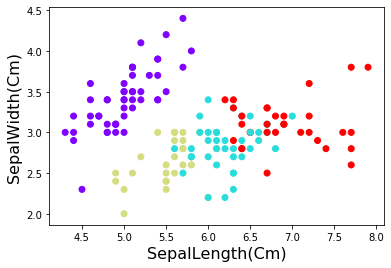

In [18]:
plt.scatter(x_1['SepalLengthCm'] , x_1['SepalWidthCm'] , c = x_1['Cluster'] , cmap = 'rainbow')
plt.xlabel('SepalLength(Cm)' , size = 16)
plt.ylabel('SepalWidth(Cm)' , size = 16)
plt.show()

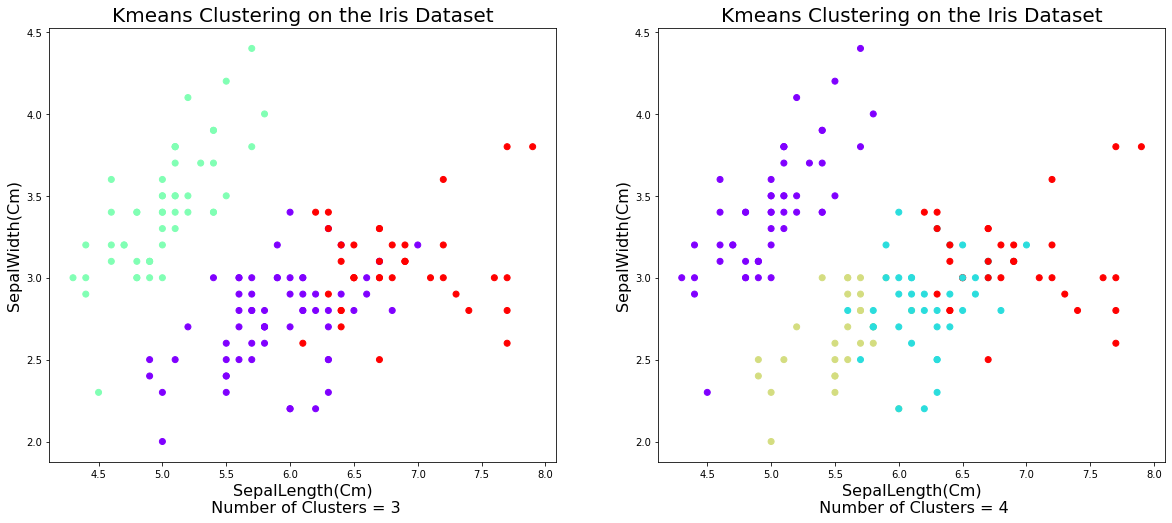

In [19]:
f , axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (20 , 8))
axes[0].scatter(x['SepalLengthCm'] , x['SepalWidthCm'] , c = x['Cluster'] , cmap = 'rainbow')
axes[1].scatter(x_1['SepalLengthCm'] , x_1['SepalWidthCm'] , c = x_1['Cluster'] , cmap = 'rainbow')
axes[0].set_xlabel('SepalLength(Cm)\n Number of Clusters = 3' , size = 16)
axes[0].set_ylabel('SepalWidth(Cm)' , size = 16)
axes[1].set_xlabel('SepalLength(Cm)\n Number of Clusters = 4' , size = 16)
axes[1].set_ylabel('SepalWidth(Cm)' , size = 16)
axes[0].set_title('Kmeans Clustering on the Iris Dataset' , size = 20)
axes[1].set_title('Kmeans Clustering on the Iris Dataset' , size = 20)
plt.show()

From the above figure it is evident that in <b>Plot 1</b>, the clustering is more prominent and there is less overlapping amongst the clusters. 
<br> Optimum number of clusters = 3